In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import geocoder

In [3]:
%matplotlib inline

In [4]:
dataset = pd.read_csv('twitter.csv')

In [6]:
dataset.head()

,Tweet,Polarity,Location,Source,Followers,Friends,Active Since
0,Barack Obama Joins Forces With Nancy Pelosi an...,0.000,colorado,Twitter Web Client,37,225,2010-01-18 03:39:33
1,RT @hermanntertsch: A Obama le dieron el Premi...,0.000,Badalona,Twitter for Android,24,46,2013-12-17 11:28:21
2,RT @The_Trump_Train: @realDonaldTrump Russia i...,0.000,Deep South Texas,Twitter for iPhone,3004,2975,2017-08-01 13:04:20
3,RT @Jamierodr10: This is what Obama has to say...,0.000,NaN,Twitter for iPhone,31285,27806,2016-07-27 00:47:41
4,@soledadobrien Obama wasnt. And neither is an...,-0.125,NaN,Twitter for iPhone,190,761,2009-06-22 01:16:38


In [7]:
location = dataset.iloc[:1000]

In [8]:
location = pd.DataFrame(location)

In [9]:
type(location['Location'])

pandas.core.series.Series

In [10]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Tweet           1000 non-null object
Polarity        1000 non-null float64
Location        636 non-null object
Source          1000 non-null object
Followers       1000 non-null int64
Friends         1000 non-null int64
Active Since    1000 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [15]:
def lng(l):
    try:
        g = geocoder.bing(l, key='********************************************')
        print(g)
        return g.latlng[1]
    except TypeError:
        print(g)
        return np.nan

In [12]:
def lat(l):
    try:
        g = geocoder.bing(l, key='*************************************************')
        print(g)
        return g.latlng[0]
    except TypeError:
        print(g)
        return np.nan

In [13]:
location['Lat'] = location['Location'].apply(lat)

<[OK] Bing - Geocode [Colorado]>
<[OK] Bing - Geocode [Badalona, Catalonia, Spain]>
<[OK] Bing - Geocode [Texas]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Clover, SC]>
<[OK] Bing - Geocode [New York, NY]>
<[OK] Bing - Geocode [Brooklyn, NY]>
<[OK] Bing - Geocode [Virginia]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Arizona]>
<[OK] Bing - Geocode [Brussels, Belgium]>
<[OK] Bing - Geocode [Chula Vista, CA]>
<[OK] Bing - Geocode [Kansas]>
<[OK] Bing - Geocode [Eastern Cape]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [USA, Caloocan City North, Philippines]>
<[OK] Bing - Geocode [New Bedford, MA]>
<[OK] Bing - Geocode [District of Columbia]>
<[OK] B

Status code Unknown from http://dev.virtualearth.net/REST/v1/Locations: ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Texas%2C+USA&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DB5A940>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))


<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Texas%2C+USA&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DB5A940>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Texas%2C+USA&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DB5A940>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Dallas, TX]>
<[O

Status code Unknown from http://dev.virtualearth.net/REST/v1/Locations: ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Global&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF75C0>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))


<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Global&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF75C0>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Global&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF75C0>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Orlando, FL]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - G

<[OK] Bing - Geocode [New Jersey]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode [Headquarters, WA]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Florida]>
<[OK] Bing - Geocode [Oregon]>
<[OK] Bing - Geocode [Cologne, NW, Germany]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Washington, DC]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [North-West]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode [Michigan]>
<[OK] Bing - Geocode [Boston, MA]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Woodstock, IL]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode [Maryland]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Ut’, Belarus]>
<[OK] Bing - Geocode [Youngstown, OH]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [West Village, NY]>
<[OK] Bing - Geocode [Californ

Status code Unknown from http://dev.virtualearth.net/REST/v1/Locations: ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF74E0>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))


<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF74E0>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF74E0>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Washin

Status code Unknown from http://dev.virtualearth.net/REST/v1/Locations: ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7860>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))


<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7860>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7860>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geoco

Status code Unknown from http://dev.virtualearth.net/REST/v1/Locations: ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Twitterverse&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF72B0>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))


<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Twitterverse&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF72B0>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Twitterverse&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF72B0>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Spain]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bi

Status code Unknown from http://dev.virtualearth.net/REST/v1/Locations: ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7400>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))


<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7400>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7400>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[OK] Bing - Geocode [To, Japan]>
<[OK] Bing - Geocode [North Carolina]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode 

Status code Unknown from http://dev.virtualearth.net/REST/v1/Locations: ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBE0B00>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))


<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBE0B00>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBE0B00>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geoco

In [16]:
location['Lng'] = location['Location'].apply(lng)

<[OK] Bing - Geocode [Colorado]>
<[OK] Bing - Geocode [Badalona, Catalonia, Spain]>
<[OK] Bing - Geocode [Texas]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Clover, SC]>
<[OK] Bing - Geocode [New York, NY]>
<[OK] Bing - Geocode [Brooklyn, NY]>
<[OK] Bing - Geocode [Virginia]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Arizona]>
<[OK] Bing - Geocode [Brussels, Belgium]>
<[OK] Bing - Geocode [Chula Vista, CA]>
<[OK] Bing - Geocode [Kansas]>
<[OK] Bing - Geocode [Eastern Cape]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [USA, Caloocan City North, Philippines]>
<[OK] Bing - Geocode [New Bedford, MA]>
<[OK] Bing - Geocode [District of Columbia]>
<[OK] B

<[OK] Bing - Geocode [Westlake Village, CA]>
<[OK] Bing - Geocode [Maryland]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Canada]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Wasilla, AK]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Texas]>
<[OK] Bing - Geocode [Recife, Brazil]>
<[OK] Bing - Geocode [Florida]>
<[OK] Bing - Geocode [Bel Air, MD]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [New York, NY]>
<[OK] Bing - Geocode [Kansas]>
<[OK] Bing - Geocode [Western]>
<[OK] Bing - Geocode [Olathe, KS]>
<[OK] Bing - Geocode [Oklahoma City, OK]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Pennsylvania]>
<[OK] Bing - Geocode [South of the Border, SC]>
<[OK] Bing - Geocode [Omaha, NE]>
<[OK] Bing - Geocode [Texas]>
<[OK] Bing - Geocode [Texas]>
<[OK] Bing - Geocode [South Carolina]>
<[OK] Bing - Geocod

Status code Unknown from http://dev.virtualearth.net/REST/v1/Locations: ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Oklahoma+City%2C+OK&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7F60>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))


<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Oklahoma+City%2C+OK&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7F60>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=Oklahoma+City%2C+OK&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7F60>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Un

<[OK] Bing - Geocode [Las Vegas, NV]>
<[OK] Bing - Geocode [Orlando, FL]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [South Carolina]>
<[OK] Bing - Geocode [Berlin]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Detroit, MI]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Texas]>
<[OK] Bing - Geocode [Michigan]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Washington, DC]>
<[OK] Bing - Geocode [South Island, Kenya]>
<[OK] Bing - Geocode [Washington, DC]>
<[OK] Bing - Geocod

<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Freehold, NJ]>
<[OK] Bing - Geocode [New Palestine, IN]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Connecticut]>
<[OK] Bing - Geocode [Montana]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Albuquerque, NM]>
<[OK] Bing - Geocode [Norway]>
<[OK] Bing - Geocode [Philadelphia, PA]>
<[OK] Bing - Geocode [San Tan Valley, AZ]>
<[OK] Bing - Geocode [Cedar Falls, IA]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[ERROR - No results found] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Tucson, AZ]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Nan

Status code Unknown from http://dev.virtualearth.net/REST/v1/Locations: ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DC24400>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))


<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DC24400>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=nan&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DC24400>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[OK] Bing - Geocode [Dallas, TX]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Dora, AL]>
<[OK] Bing - Geocode [Nan,

<[OK] Bing - Geocode [Florida]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Canada]>
<[OK] Bing - Geocode [Nan, Thailand]>
<[OK] Bing - Geocode [Central]>


Status code Unknown from http://dev.virtualearth.net/REST/v1/Locations: ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=England%2C+United+Kingdom&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7748>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))


<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=England%2C+United+Kingdom&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7748>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[ERROR - HTTPConnectionPool(host='dev.virtualearth.net', port=80): Max retries exceeded with url: /REST/v1/Locations?q=England%2C+United+Kingdom&o=json&inclnb=1&key=AoDwU0ajsZEGI08y4mYAKHy4n9javlzeaxZcZpzFfJq1quL2iBK83JTPVGVk-sH9&maxResults=1 (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x000001D87DBF7748>, 'Connection to dev.virtualearth.net timed out. (connect timeout=5.0)'))] Bing - Geocode [empty]>
<[OK] Bing - Geocode [United States]>
<[OK] Bing - Geocode [Kentucky]>
<[OK] Bing - Geoc

In [17]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Tweet           1000 non-null object
Polarity        1000 non-null float64
Location        636 non-null object
Source          1000 non-null object
Followers       1000 non-null int64
Friends         1000 non-null int64
Active Since    1000 non-null object
Lat             965 non-null float64
Lng             968 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 70.4+ KB


In [18]:
def sentiment(sen):
    if sen>0.0:
        return 'P'
    elif sen<0.0:
        return 'N'
    else:
        return 'O'

In [19]:
location['Sentiment'] = location['Polarity'].apply(sentiment)

In [20]:
def popularity(followers):
    thresh=300
    if followers>thresh:
        return 'Popular'
    elif followers<=thresh:
        return 'Unpopular'

In [21]:
location['Popularity'] = location['Followers'].apply(popularity)

In [22]:
location['Active Since'] = pd.to_datetime(location['Active Since'])
location['Active Since'] = 2018 - location['Active Since'].dt.year

In [23]:
def source(source):
    if 'Web' in source:
        return 'Web'
    elif 'Android' in source:
        return 'Android'
    elif 'iPhone' in source:
        return 'iPhone'

In [24]:
location['Source'] = location['Source'].apply(source)

In [25]:
location.head()

,Tweet,Polarity,Location,Source,Followers,Friends,Active Since,Lat,Lng,Sentiment,Popularity
0,Barack Obama Joins Forces With Nancy Pelosi an...,0.000,colorado,Web,37,225,8,38.998543,-105.547813,O,Unpopular
1,RT @hermanntertsch: A Obama le dieron el Premi...,0.000,Badalona,Android,24,46,5,41.450489,2.244920,O,Unpopular
2,RT @The_Trump_Train: @realDonaldTrump Russia i...,0.000,Deep South Texas,iPhone,3004,2975,1,31.462755,-99.333031,O,Popular
3,RT @Jamierodr10: This is what Obama has to say...,0.000,NaN,iPhone,31285,27806,2,18.793190,100.779800,O,Popular
4,@soledadobrien Obama wasnt. And neither is an...,-0.125,NaN,iPhone,190,761,9,18.793190,100.779800,N,Unpopular


In [26]:
location.to_csv('tweet2.csv', encoding='utf-8')

In [7]:
location = pd.read_csv('tweet2.csv',index_col=0)
location.head()

,Tweet,Polarity,Location,Source,Followers,Friends,Active Since,Lat,Lng,Sentiment,Popularity
0,Barack Obama Joins Forces With Nancy Pelosi an...,0.000,colorado,Web,37,225,8,38.998543,-105.547813,O,Unpopular
1,RT @hermanntertsch: A Obama le dieron el Premi...,0.000,Badalona,Android,24,46,5,41.450489,2.244920,O,Unpopular
2,RT @The_Trump_Train: @realDonaldTrump Russia i...,0.000,Deep South Texas,iPhone,3004,2975,1,31.462755,-99.333031,O,Popular
3,RT @Jamierodr10: This is what Obama has to say...,0.000,NaN,iPhone,31285,27806,2,18.793190,100.779800,O,Popular
4,@soledadobrien Obama wasnt. And neither is an...,-0.125,NaN,iPhone,190,761,9,18.793190,100.779800,N,Unpopular


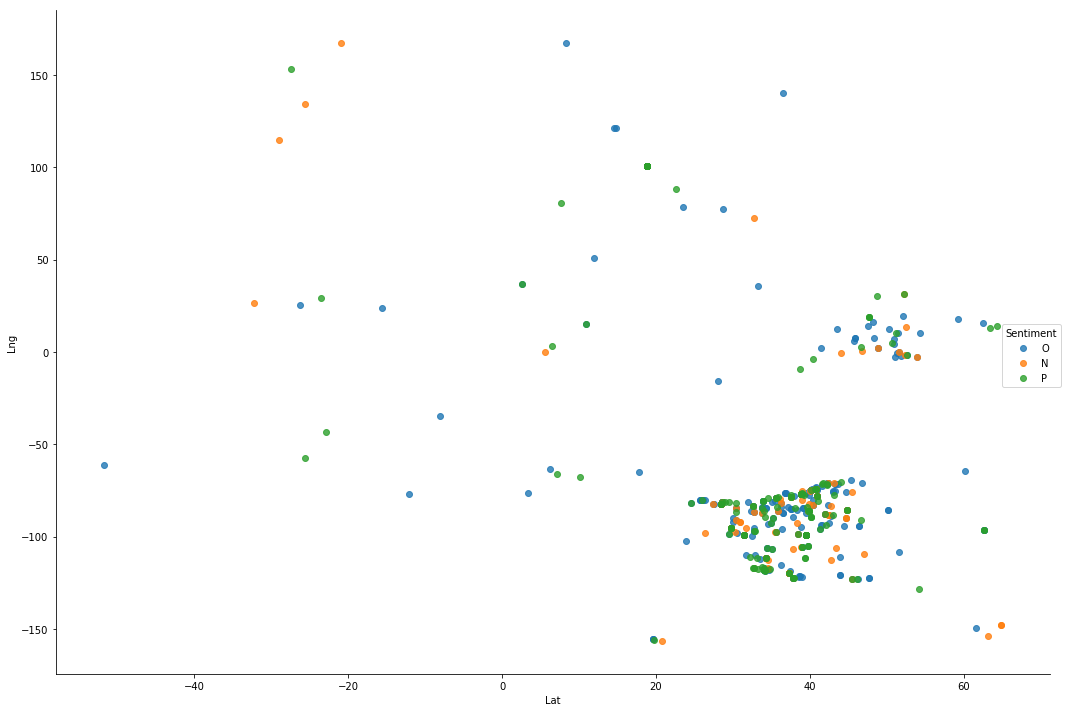

In [8]:
sns.lmplot(x='Lat',y='Lng',data=location, fit_reg=False,scatter=True,hue='Sentiment',size=10,aspect=1.4)
plt.tight_layout()

We can see that the maximum tweets came from one particular area. And the area with maximum population density gives out Positive tweets, where as the are with scattered people either gives Negative or Neutral Tweets

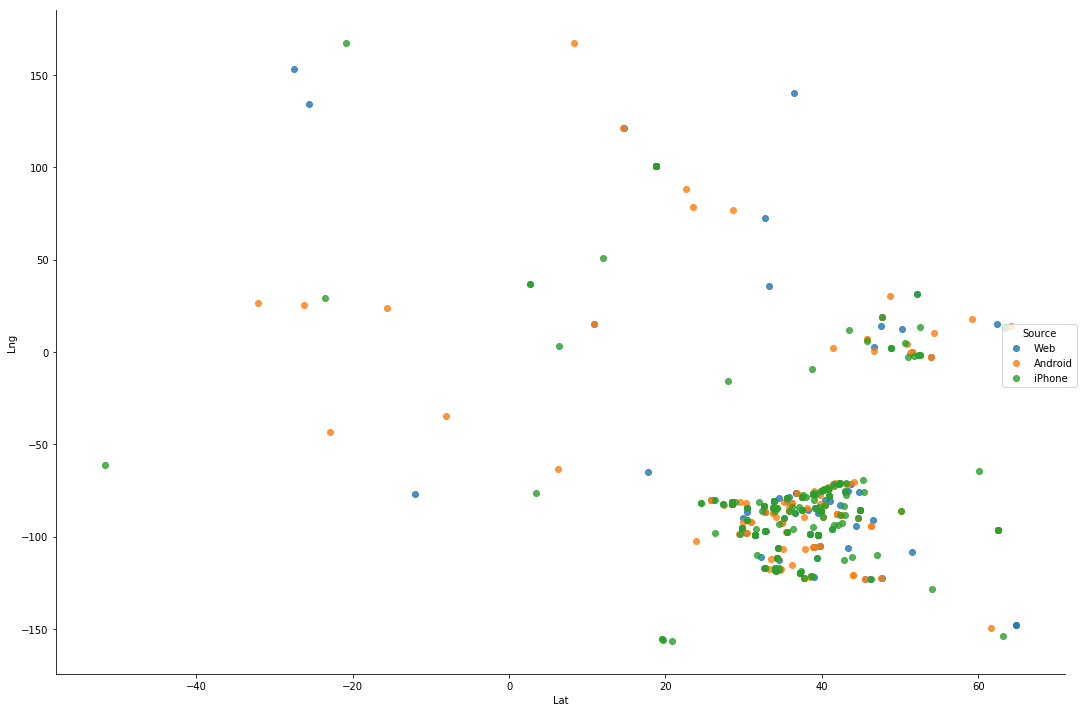

In [31]:
sns.lmplot(x='Lat',y='Lng',data=location, fit_reg=False,scatter=True,hue='Source',size=10,aspect=1.4)
plt.tight_layout()

Similar trend for the Android, the maximum population density area gives us iPhone users, whereas people with Android are much more scattered.

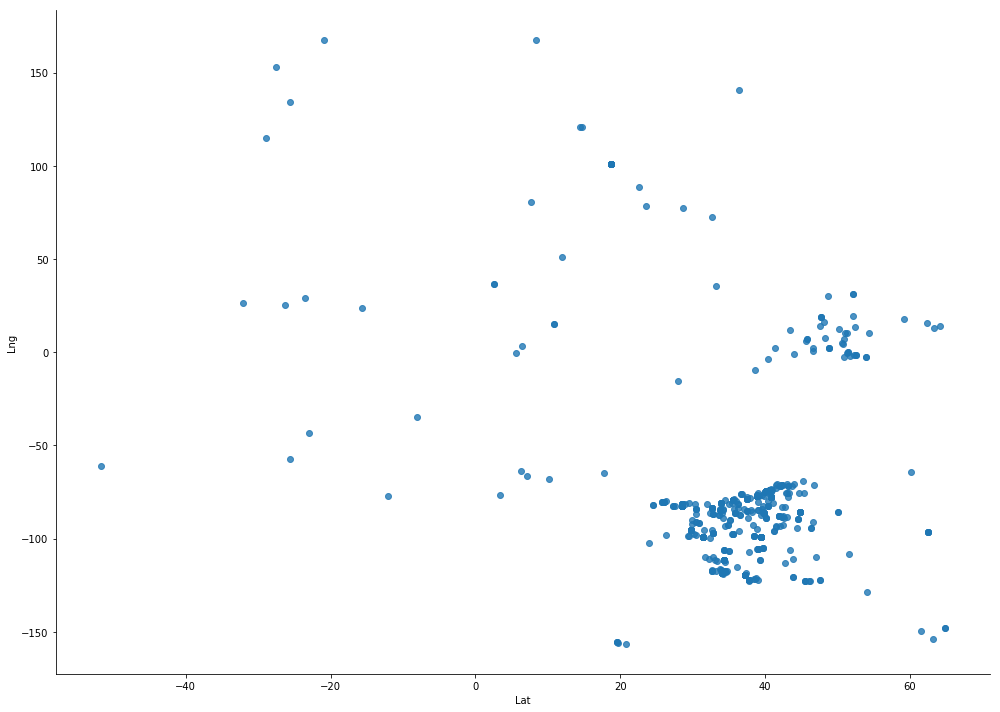

In [9]:
sns.lmplot(x='Lat',y='Lng',data=location, fit_reg=False,scatter=True,size=10,aspect=1.4)
plt.tight_layout()

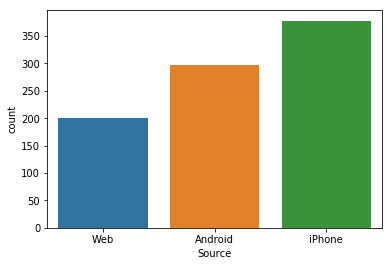

In [35]:
sns.countplot(x='Source', data=location)

We have Maximum iPhone users. Let us see how they differ in Sentiment

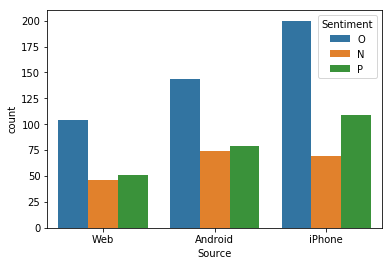

In [37]:
sns.countplot('Source', hue='Sentiment',data=location)

We can see that the ratio of Positive to Negative is more for iPhone users, where as on Android people are equally likely to be Pos or Neg.
Also the most uncertain people fall on the iPhone side. 
**Making uncertain people into Positive is much easier than making negative people positive, so rather we should target on the iPhone segment**

Let us see the active since, and how it makes an impact.

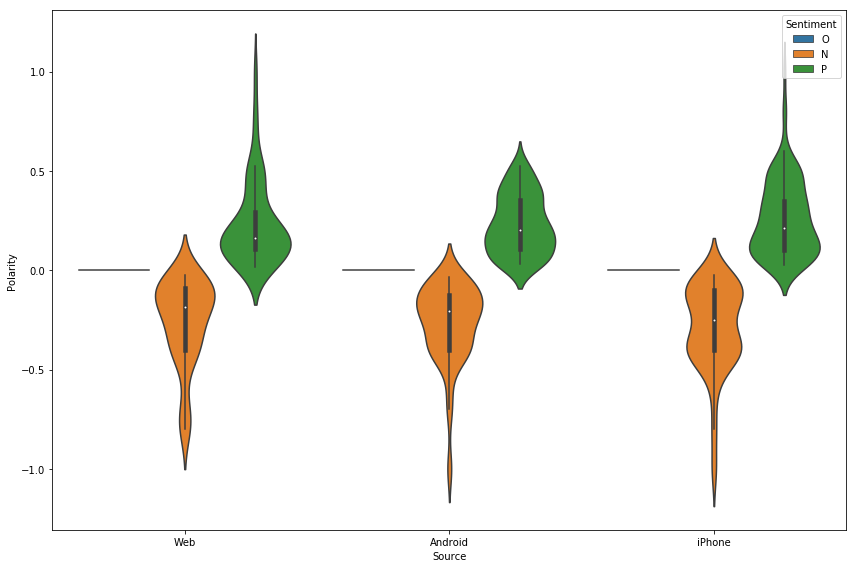

In [70]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Source', y='Polarity', data=location, hue='Sentiment')
plt.tight_layout()

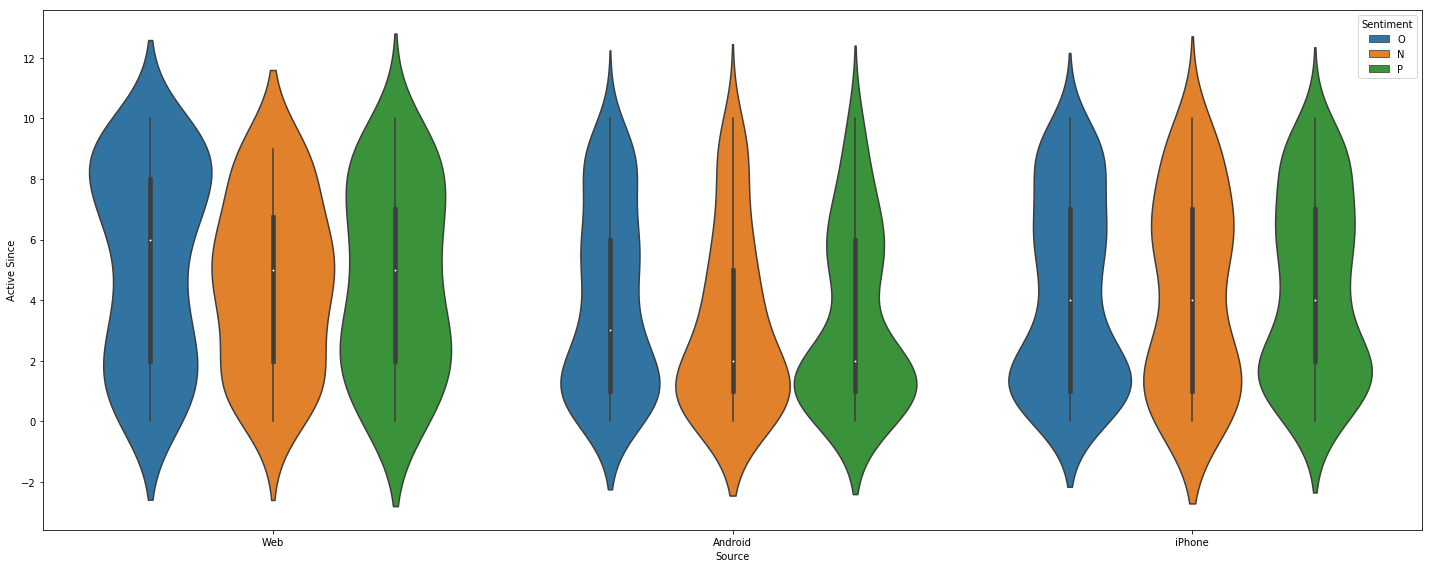

In [65]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Source', y='Active Since', data=location, hue='Sentiment')
plt.tight_layout()

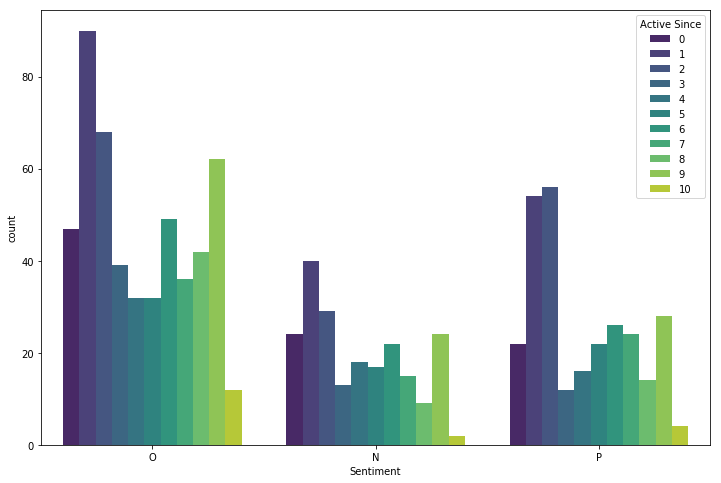

In [67]:
plt.figure(figsize=(12,8))
sns.countplot('Sentiment', data=location,hue='Active Since',palette='viridis')